<a href="https://colab.research.google.com/github/Plumz17/PCD_Assignment01/blob/main/PCD_Assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#First Digital Image Processing Assignment
##Analysis of Upsampling and Downsampling - Anders Emmanuel Tan (24/541351/PA/22964)

## 1. Setting Up Image to be Processed

In [ ]:
#Cloning Github Repository to get the Image
!rm -rf PCD_Assignment01
!git clone https://github.com/Plumz17/PCD_Assignment01

Cloning into 'PCD_Assignment01'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 39 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (39/39), 2.88 MiB | 15.92 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [ ]:
# Import Important Libraries
import cv2 # For Reading Image
import numpy as np # For Manipulating Image Matrix
import matplotlib.pyplot as plt # For Showing Image

filename1 = "/content/PCD_Assignment01/image.png" # Image Source: https://www.britannica.com/animal/booby
filename2 = "/content/PCD_Assignment01/image_low.png"
img = cv2.imread(filename1) # Read Image
img2 = cv2.imread(filename2)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Change the color map since apparently CV2 defaults on BGR and not RGB'
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

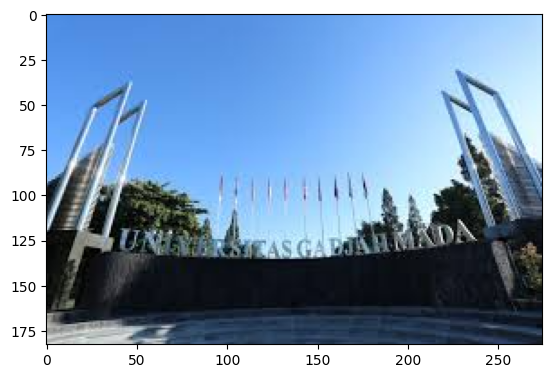

In [ ]:
def show(img): # Helper function to check if image can be processed
  plt.imshow(img)

In [ ]:
show(img) # Citra yang digunakan untuk Downsampling

In [ ]:
show(img2) # Citra yang digunakan untuk Upsampling

## 2. Downsampling Using Maximum Method

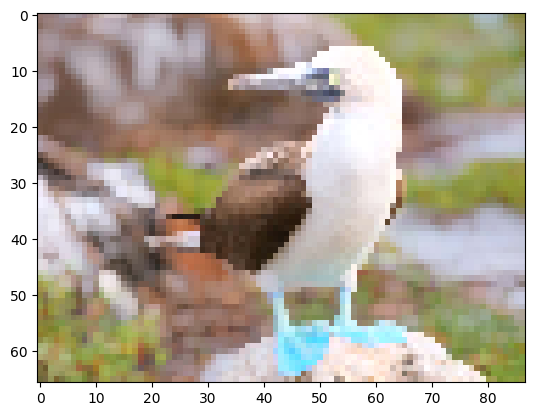

In [ ]:
#Down Sampling using Maximum Method
def downsample_max(img, factor):
  height, width, channels = img.shape #Extract the height, width, and channels of the image
  new_height = height // factor
  new_width = width // factor
  if (new_height == 0 or new_width == 0):
    print("Factor is to high, Can't Down Sample")
    return
  new_img = np.zeros((new_height, new_width, channels), dtype=np.uint8) # Create an empty image with the reduced size
  for i in range(new_height): #Process every pixel of the new image
    for j in range(new_width):
      # Calculate the starting and ending coordinates for the current block
      start_row = i * factor
      end_row = (i + 1) * factor
      start_col = j * factor
      end_col = (j + 1) * factor
      block = img[start_row:end_row, start_col:end_col] # Extract the current block of the image
      new_img[i, j] = np.max(block, axis=(0, 1)) # Find the maximum value for each channel within the block and keep the channels intact.
  return new_img

new_image_max = downsample_max(img, 10)
show(new_image_max)

###Analisis Downsampling Metode Maksimum
Metode Max Pooling bekerja dengan mengambil intensitas/value maksimum dari setiap "block" dari citra yang ingin diproses dan menempatkan pixel tersebut pada citra yang baru. Pendekatan ini memiliki beberapa efek kepada citra yang telah di Downsample. Pertama, Metode ini akan meninggalkan intensitas yang paling tinggi sehingga metode ini dapat bekerja baik dalam menyoroti tepi/edges atau bagian-bagian terang pada suatu citra. Namun, hal tersebut juga membuat citra sangat sensitif jika ada satu saja pixel yang memiliki intensitas tinggi di suatu darah. Dengan itu, metode ini akan baik digunakan jika kita ingin menentukan fitur-fitur menonjol pada suatu gambar karena metode ini menjaga detail-detail yang memiliki kontras tinggi.

## 3. Downsampling using Average Method

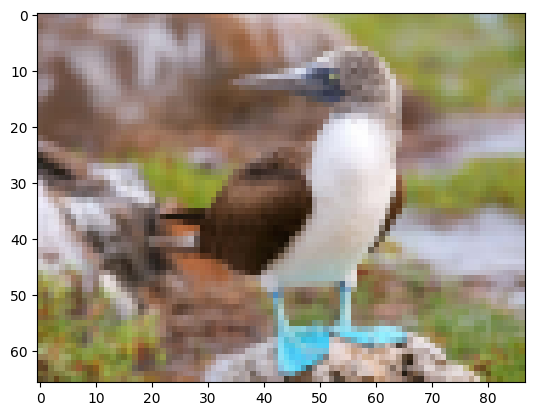

In [ ]:
#Downsampling using Average Method

def downsample_avg(img, factor):
  height, width, channels = img.shape #Extract the height, width, and channels of the image
  new_height = height // factor
  new_width = width // factor
  new_img = np.zeros((new_height, new_width, channels), dtype=np.uint8) # Create an empty image with the reduced size
  for i in range(new_height): #Process every pixel of the new image
    for j in range(new_width):
      # Calculate the starting and ending coordinates for the current block
      start_row = i * factor
      end_row = (i + 1) * factor
      start_col = j * factor
      end_col = (j + 1) * factor
      block = img[start_row:end_row, start_col:end_col] # Extract the current block of the image
      new_img[i, j] = np.average(block, axis=(0, 1)) # Find the average value for each channel within the block and keep the channels intact.
  return new_img

new_image_avg = downsample_avg(img, 10)
show(new_image_avg)

###Analisis Downsampling Metode Average
Metode Max Pooling bekerja dengan mengambil intensitas/value maksimum dari setiap "block" dari citra yang ingin diproses dan menempatkan pixel tersebut pada citra yang baru. Pendekatan ini memiliki beberapa efek kepada citra yang telah di Downsample. Pertama, Metode ini akan meninggalkan intensitas yang paling tinggi sehingga metode ini dapat bekerja baik dalam menyoroti tepi/edges atau bagian-bagian terang pada suatu citra. Namun, hal tersebut juga membuat citra sangat sensitif jika ada satu saja pixel yang memiliki intensitas tinggi di suatu darah. Dengan itu, metode ini akan baik digunakan jika kita ingin menentukan fitur-fitur menonjol pada suatu gambar karena metode ini menjaga detail-detail yang memiliki kontras tinggi.

## 4. Downsampling using Median Method

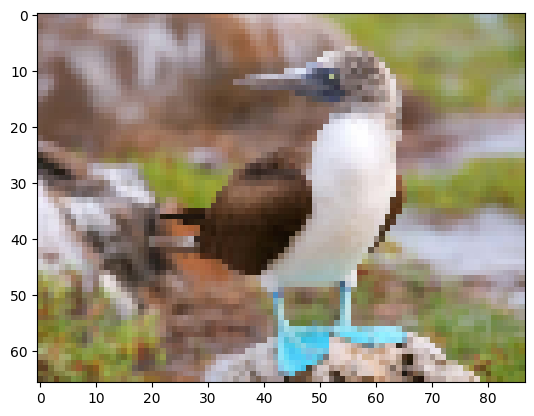

In [ ]:
#Downsampling using Median Method

def downsample_med(img, factor):
  height, width, channels = img.shape #Extract the height, width, and channels of the image
  new_height = height // factor
  new_width = width // factor
  new_img = np.zeros((new_height, new_width, channels), dtype=np.uint8) # Create an empty image with the reduced size
  for i in range(new_height): #Process every pixel of the new image
    for j in range(new_width):
      # Calculate the starting and ending coordinates for the current block
      start_row = i * factor
      end_row = (i + 1) * factor
      start_col = j * factor
      end_col = (j + 1) * factor
      block = img[start_row:end_row, start_col:end_col] # Extract the current block of the image
      new_img[i, j] = np.median(block, axis=(0, 1)) # Find the median value for each channel within the block and keep the channels intact.
  return new_img

new_image_med = downsample_med(img, 10)
show(new_image_med)

###Analisis Downsampling Metode Median
Metode Max Pooling bekerja dengan mengambil intensitas/value maksimum dari setiap "block" dari citra yang ingin diproses dan menempatkan pixel tersebut pada citra yang baru. Pendekatan ini memiliki beberapa efek kepada citra yang telah di Downsample. Pertama, Metode ini akan meninggalkan intensitas yang paling tinggi sehingga metode ini dapat bekerja baik dalam menyoroti tepi/edges atau bagian-bagian terang pada suatu citra. Namun, hal tersebut juga membuat citra sangat sensitif jika ada satu saja pixel yang memiliki intensitas tinggi di suatu darah. Dengan itu, metode ini akan baik digunakan jika kita ingin menentukan fitur-fitur menonjol pada suatu gambar karena metode ini menjaga detail-detail yang memiliki kontras tinggi.

## 5. Upsampling using Nearest Neighbor Method

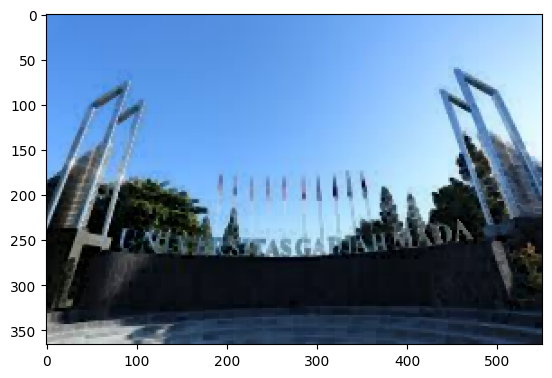

In [ ]:
#Up Sampling using Nearest Neighbor Method

def upsample_nn(img, factor):
  height, width, channels = img.shape #Extract the height, width, and channels of the image
  new_height = height * factor
  new_width = width * factor
  new_img = np.zeros((new_height, new_width, channels), dtype=np.uint8) # Create an empty image with the increased size

  for i in range(new_height): #Process every pixel of the new image
    for j in range(new_width):
      # Get Old pixel location
      old_i = i / factor
      old_j = j / factor

      # Get neighbors of the new pixel
      i0, j0 = int(np.floor(old_i)), int(np.floor(old_j))
      i1, j1 = min(i0+1, height-1), min(j0+1, width-1)

      # Collect neighbors into an array
      neighbors = [
        img[i0, j0],
        img[i0, j1],
        img[i1, j0],
        img[i1, j1]
      ]

      # Take the minimum value neighbors and use that as the value in the new image
      new_img[i, j] = np.min(neighbors, axis=0)

  return new_img

new_image_nn = upsample_nn(img2, 2)
show(new_image_nn)

###Analisis Upsampling Metode Nearest Neighbour
Metode Max Pooling bekerja dengan mengambil intensitas/value maksimum dari setiap "block" dari citra yang ingin diproses dan menempatkan pixel tersebut pada citra yang baru. Pendekatan ini memiliki beberapa efek kepada citra yang telah di Downsample. Pertama, Metode ini akan meninggalkan intensitas yang paling tinggi sehingga metode ini dapat bekerja baik dalam menyoroti tepi/edges atau bagian-bagian terang pada suatu citra. Namun, hal tersebut juga membuat citra sangat sensitif jika ada satu saja pixel yang memiliki intensitas tinggi di suatu darah. Dengan itu, metode ini akan baik digunakan jika kita ingin menentukan fitur-fitur menonjol pada suatu gambar karena metode ini menjaga detail-detail yang memiliki kontras tinggi.

## 6. Upsampling using Bilinear Method

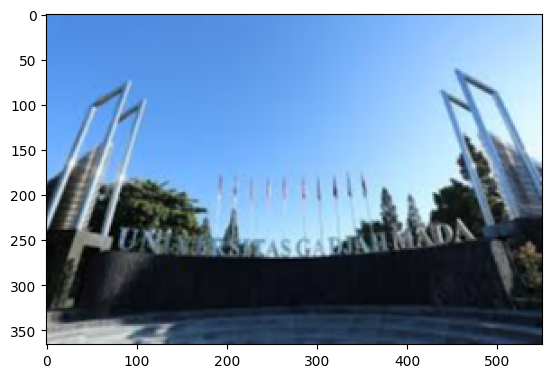

In [ ]:
#Up Sampling using Bilinear Method

def upsample_bilinear(img, factor):
  height, width, channels = img.shape #Extract the height, width, and channels of the image
  new_height = height * factor
  new_width = width * factor
  new_img = np.zeros((new_height, new_width, channels), dtype=np.uint8) # Create an empty image with the increased size

  for i in range(new_height): #Process every pixel of the new image
    for j in range(new_width):
      # Get Old pixel location
      old_i = i / factor
      old_j = j / factor

      # Get neighbors of the new pixel
      i0, j0 = int(np.floor(old_i)), int(np.floor(old_j))
      i1, j1 = min(i0+1, height-1), min(j0+1, width-1) #Make sure not to get out of bounds

      # Collect neighbors into an array
      neighbors = [
        img[i0, j0],
        img[i0, j1],
        img[i1, j0],
        img[i1, j1]
      ]

      # Average neighbors and use the average in the new image
      new_img[i, j] = np.mean(neighbors, axis=0)

  return new_img

new_image_bilinear = upsample_bilinear(img2, 2)
show(new_image_bilinear)

###Analisis Upsampling Bilinear Neighbour


## 7. Upsampling using Bicubic Method

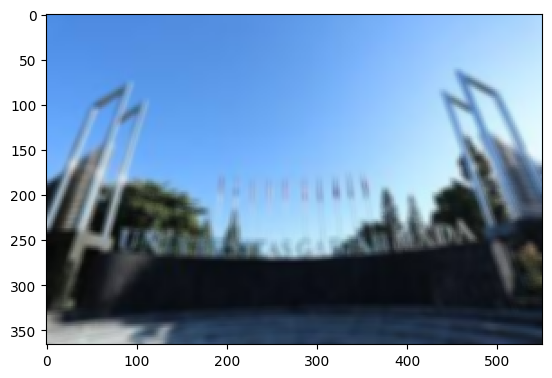

In [ ]:
#Up Sampling using Bicubic Method

def upsample_bicubic(img, factor, w1=0.6, w2=0.4):
  height, width, channels = img.shape #Extract the height, width, and channels of the image
  new_height = height * factor
  new_width = width * factor
  new_img = np.zeros((new_height, new_width, channels), dtype=np.uint8) # Create an empty image with the increased size

  for i in range(new_height): #Process every pixel of the new image
    for j in range(new_width):
      # Get Old pixel location
        old_i = int(i / factor)
        old_j = int(j / factor)

        # collect inner ring (direct neighbors)
        inner = []
        for x in [-1, 0, 1]:
          for y in [-1, 0, 1]:
            if x == 0 and y == 0: # Don't include center
              continue
            new_i, new_j = old_i + x, old_j + y
            if 0 <= new_i < height and 0 <= new_j < width: #Make sure pixels are not out of bound
              inner.append(img[new_i, new_j]) #Add element of ring to list

        # collect outer ring (pixels 2 steps away)
        outer = []
        for x in [-2, -1, 0, 1, 2]:
          for y in [-2, -1, 0, 1, 2]:
            if abs(x) == 2 or abs(y) == 2:  # outer frame only
              new_i, new_j = old_i + x, old_j + y
              if 0 <= new_i < height and 0 <= new_j < width: #Make sure pixels are not out of bound
                outer.append(img[new_i, new_j])

        # calculate the averages of the inner and outer ring
        avg_inner = np.mean(inner, axis=0) if inner else 0
        avg_outer = np.mean(outer, axis=0) if outer else 0

        # calculate weighted sum
        new_val = w1 * avg_inner + w2 * avg_outer
        new_img[i, j] = new_val

  return new_img

new_image_bicubic = upsample_bicubic(img2, 2)
show(new_image_bicubic)

###Analisis Upsampling Bicubic Neighbour
